Dataset loaded successfully!

Explained variance by each component: [0.12935272 0.07263593]
Total variance explained by 2 components: 20.20%

Corrected plot saved as 'juror_pca_visualization_corrected.png'


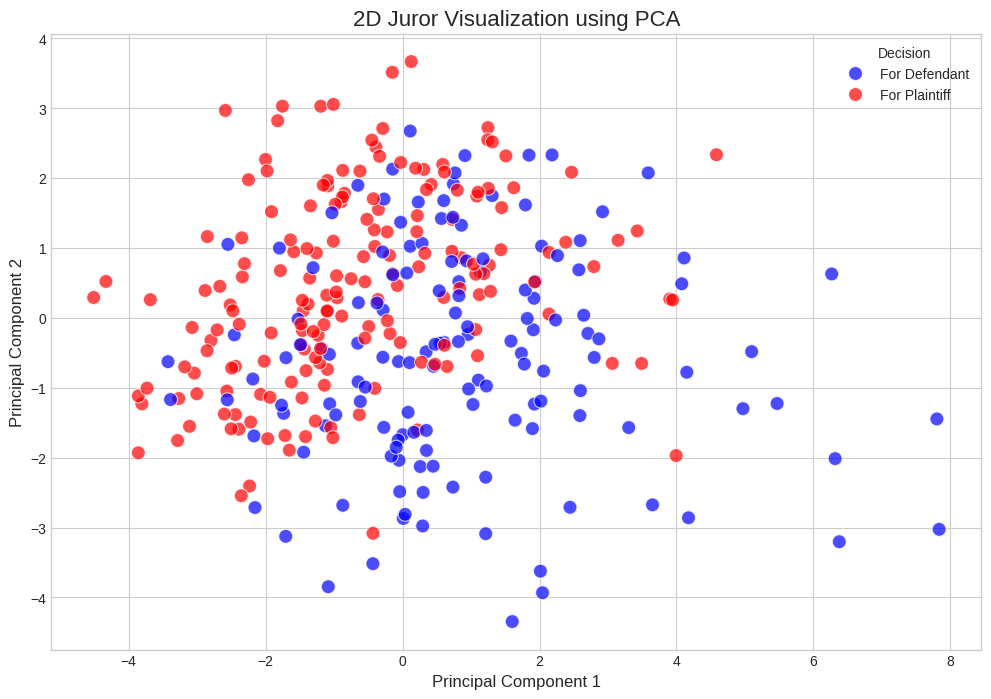

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# --- 1. Load and Prepare the Data ---
try:
    df = pd.read_csv('dataset/final_dataset.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'final_dataset.csv' not found. Please check the file path.")
    exit()

# Separate features (X) and the target (y) for coloring the plot
X = df.drop('Prove', axis=1)
y = df['Prove']

# PCA is affected by the scale of features, so we must standardize the data first
X_scaled = StandardScaler().fit_transform(X)

# --- 2. Perform PCA ---
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a new DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
# Add the target variable with meaningful names for the legend
pca_df['Decision'] = y.map({0: 'For Defendant', 1: 'For Plaintiff'})

print(f"\nExplained variance by each component: {pca.explained_variance_ratio_}")
print(f"Total variance explained by 2 components: {sum(pca.explained_variance_ratio_):.2%}")

# --- 3. Create the 2D Visualization Plot ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Decision',  # Use the new 'Decision' column for the legend
    hue_order=['For Defendant', 'For Plaintiff'], # Ensure consistent order
    palette={'For Defendant': 'blue', 'For Plaintiff': 'red'}, # Explicitly set colors
    data=pca_df,
    alpha=0.7,
    s=100
)

# Add titles and labels for clarity
plt.title('2D Juror Visualization using PCA', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
# The legend is now automatically handled correctly by seaborn
plt.grid(True)
plt.savefig('juror_pca_visualization_corrected.png')
print("\nCorrected plot saved as 'juror_pca_visualization_corrected.png'")